### Data exploration of new widgets

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import fiona 

In [ ]:
#data viz https://www.data-to-viz.com/index.html

## 1. Species count/list country
[data](https://github.com/Vizzuality/mangrove-atlas/issues/330)

In [2]:
sp = pd.read_csv('/Users/tamarahuete/Downloads/Mangrove_Biodiversity.csv', encoding = 'latin-1')

In [3]:
sp.head()

,Species,Acanthus ebracteatus,Acanthus ilicifolius,Acrostichum aureum,Acrostichum danaeifolium,Acrostichum speciosum,Aegialitis annulata,Aegialitis rotundifolia,Aegiceras corniculatum,Aegiceras floridum,...,Sonneratia caseolaris,Sonneratia griffithii,Sonneratia lanceolata,Sonneratia ovata,Sonneratia x gulngai,Sonneratia x hainanensis,Sonneratia x urama,Tabebuia palustris,Xylocarpus granatum,Xylocarpus moluccensis
0,Comoros,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Kenya,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Madagascar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Mauritius,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Mayotte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [68]:
## Worldwide view

<AxesSubplot:ylabel='Species'>

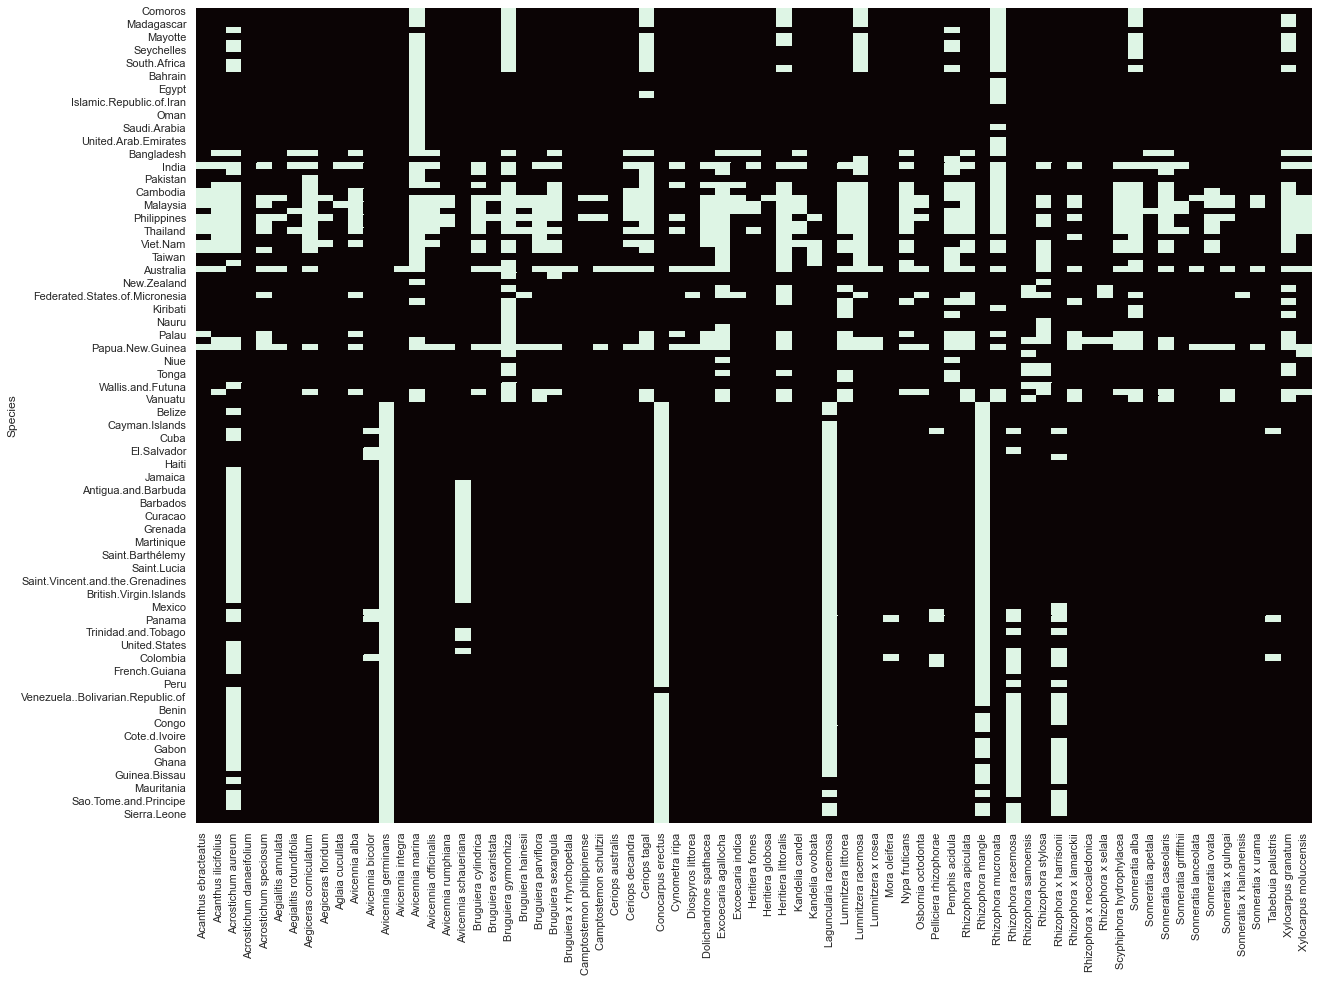

In [12]:
sp1 = sp.set_index('Species')
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(sp1, cbar=False, cmap="mako")

<AxesSubplot:>

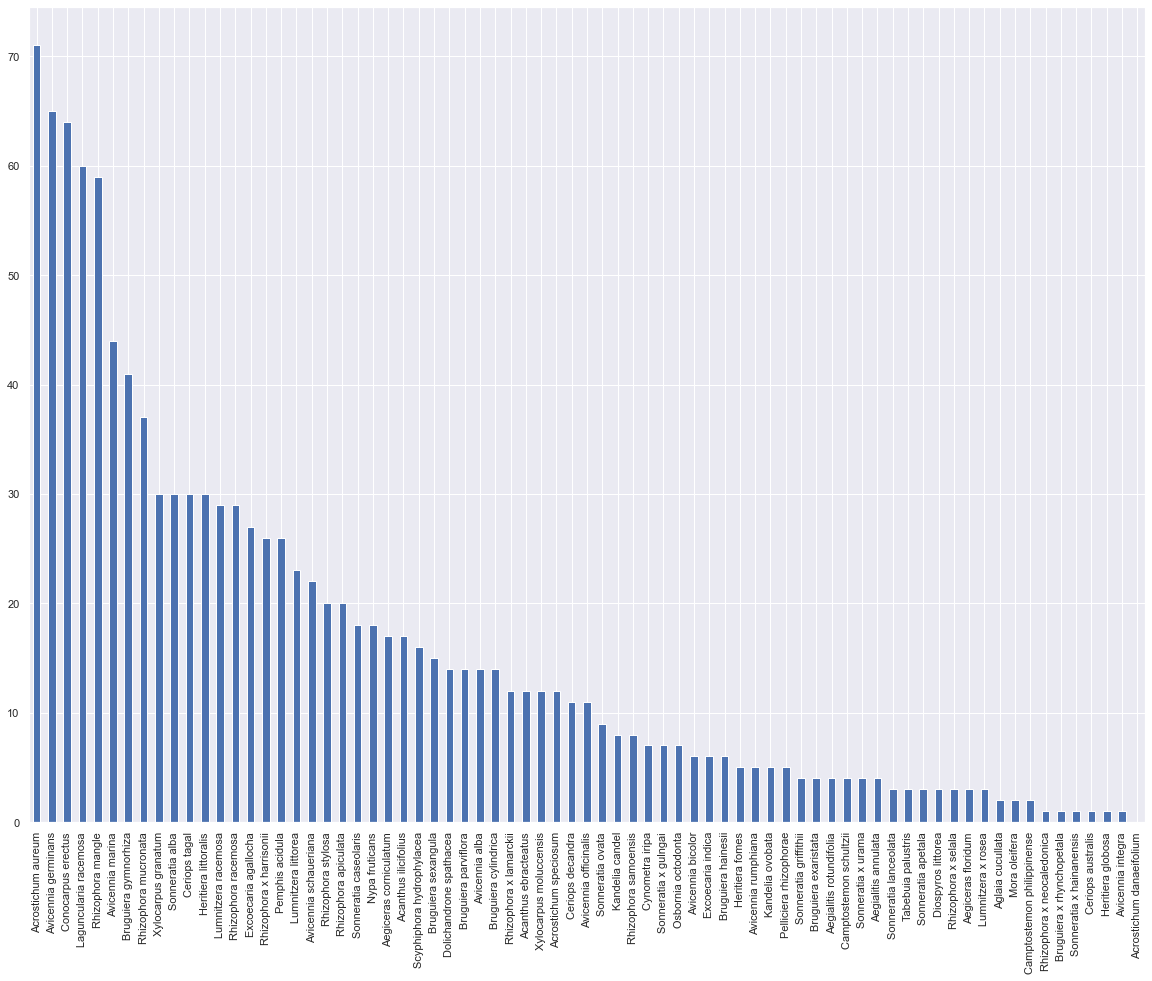

In [80]:
sp1.sum(axis=0).sort_values(ascending=False).plot.bar()

<AxesSubplot:ylabel='None'>

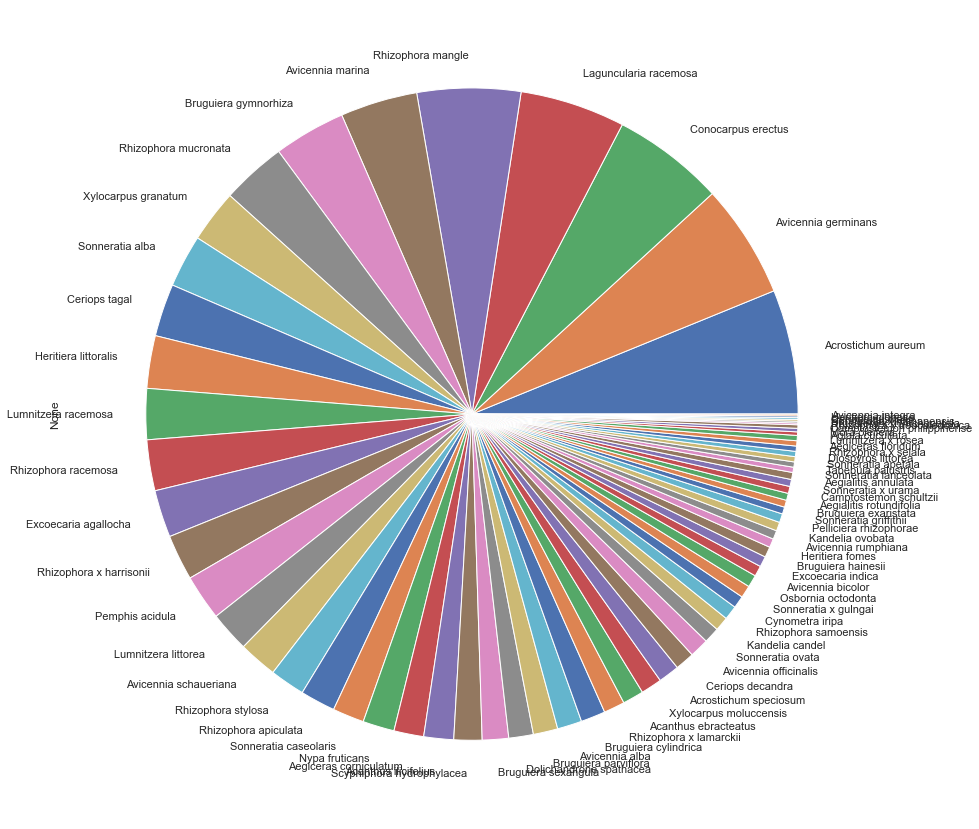

In [13]:
sp1.sum(axis=0).sort_values(ascending=False).plot.pie()

In [ ]:
### Country view

In [103]:
country = 'Indonesia'
df = sp[sp['Species']==country]
for col in df.columns:
    if df[[col]].values[0]==0:
        df.drop(col,inplace=True,axis=1)

/Users/tamarahuete/opt/anaconda3/envs/gdalML/lib/python3.7/site-packages/pandas/core/frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
### Count species by country

In [177]:
df

,Species,Acanthus ebracteatus,Acanthus ilicifolius,Acrostichum aureum,Acrostichum speciosum,Aegialitis annulata,Aegiceras corniculatum,Aegiceras floridum,Avicennia alba,Avicennia marina,...,Rhizophora x lamarckii,Scyphiphora hydrophylacea,Sonneratia alba,Sonneratia caseolaris,Sonneratia lanceolata,Sonneratia ovata,Sonneratia x gulngai,Sonneratia x urama,Xylocarpus granatum,Xylocarpus moluccensis
29,Indonesia,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [182]:
pd.DataFrame(data ={'species':df.columns[1:],'IUCN_cat':None}).to_csv('/Users/tamarahuete/Downloads/Indonesia_species_IUCN.csv')

In [185]:
iucn =pd.read_csv('/Users/tamarahuete/Downloads/Indonesia_species_IUCN.csv',sep = ';')

In [186]:
iucn.head()

,Unnamed: 0,species,IUCN_cat
0,0,Acanthus ebracteatus,LC
1,1,Acanthus ilicifolius,LC
2,2,Acrostichum aureum,LC
3,3,Acrostichum speciosum,LC
4,4,Aegialitis annulata,LC


In [204]:
iucn[iucn['IUCN_cat']=='EN']

,Unnamed: 0,species,IUCN_cat
17,17,Camptostemon philippinense,EN
24,24,Heritiera globosa,EN


In [197]:
sp_count=list(iucn.groupby('IUCN_cat').count().species)
cat = list(iucn.groupby('IUCN_cat').count().index)

In [202]:
sp_count

[1, 1, 2, 37, 3, 1]

In [199]:
cat

['CR', 'DD', 'EN', 'LC', 'NT', 'VU']

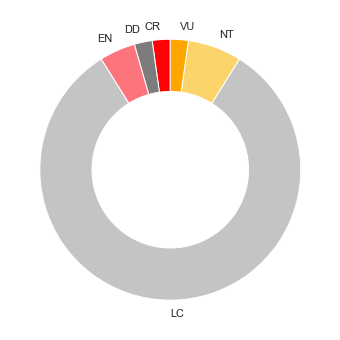

In [201]:
### Restoration Score (Indonesia)
fig, ax = plt.subplots(figsize=(6, 6))
 
ax.pie(sp_count, 
       labels=cat,
       wedgeprops={'width':0.4}, 
       startangle=90,
      colors=['#FC0404','#7c7c7c','#FC747c','#c4c4c4','#fcd46c','#FFA500'])
plt.show()

In [108]:
df.unstack().count()

46

In [139]:
country_sp = list(df.columns[1:])
endemic = list(sp1.columns[np.where(sp1.sum(axis=0)==1)])

In [140]:
list(set(country_sp) & set(endemic))

['Heritiera globosa']

## 2. Mangrove restoration potential
[data](https://github.com/Vizzuality/mangrove-atlas/issues/331)  
[dashboard to mimic](https://maps.oceanwealth.org/mangrove-restoration/)

In [4]:
gdb_file ='/Users/tamarahuete/Downloads/MOW_Global_Mangrove_Restoration_20190411.gdb'
layers = fiona.listlayers(gdb_file)

In [5]:
layers

['Global_Mangrove_Restoration_Jurisdiction_Envelope',
 'Global_Mangrove_Restoration_Typology']

In [6]:
layer0 = gpd.read_file('/Users/tamarahuete/Downloads/MOW_Global_Mangrove_Restoration_20190411.gdb', driver='FileGDB', layer=0)

In [7]:
# Geography
layer0.head()

,Country,Tot_Restor,Restor_pct,Rest_Area_Loss,Area_loss_pct,Rest_Area_Dgrd,Area_dgrd_pct,Total_2016,Mean_Score,SOC,AGB,People,Fish_Score,Fish_Score_Inv,Shape_Length,Shape_Area,Loss_Driver,geometry
0,American Samoa,0.00000,0,0.00,0,0.00,0,18.74,0,0.000000,0.000000,0,109000000.0,200000.0,5.350212e+04,1.638363e+07,No Data,"MULTIPOLYGON (((-19011686.866 -1613074.241, -1..."
1,Angola,580.11556,4,671.43,5,68.92,0,13286.05,62,220274.238512,30809.263129,3800,-1.0,-1.0,1.383794e+06,2.785231e+10,NPC,"MULTIPOLYGON (((1550210.491 -1230695.594, 1549..."
2,Anguilla,0.08128,4,1.27,59,0.00,0,0.87,24,407.670000,6.524752,0,1000000.0,2000000.0,2.097797e+04,1.419573e+06,No Data,"MULTIPOLYGON (((-7025249.376 2058315.576, -702..."
3,Antigua and Barbuda,14.15571,2,20.19,2,0.00,0,886.30,22,9031.556968,1078.042000,500,8000000.0,13000000.0,1.888816e+05,1.361710e+09,No Data,"MULTIPOLYGON (((-6873186.951 1921601.093, -688..."
4,Aruba,19.38207,36,20.55,38,0.00,0,33.79,46,9816.581150,1374.874165,0,71000000.0,119000000.0,3.798229e+04,2.166772e+07,No Data,"MULTIPOLYGON (((-7781925.061 1393950.107, -778..."


In [143]:
country = 'Indonesia'
layer0[layer0['Country']==country]

,Country,Tot_Restor,Restor_pct,Rest_Area_Loss,Area_loss_pct,Rest_Area_Dgrd,Area_dgrd_pct,Total_2016,Mean_Score,SOC,AGB,People,Fish_Score,Fish_Score_Inv,Shape_Length,Shape_Area,Loss_Driver,geometry
51,Indonesia,186611.13816,6,220370.3,8,41900.8,1,2703409.82,61,1.148004e+08,2.133317e+07,401600,1.602650e+11,2.191560e+11,1.157250e+07,6.608435e+12,Commodities,"MULTIPOLYGON (((13675129.428 -1225681.247, 120..."


In [146]:
layer0[layer0['Country']==country].unstack()

Country         51                                            Indonesia
Tot_Restor      51                                         186611.13816
Restor_pct      51                                                    6
Rest_Area_Loss  51                                             220370.3
Area_loss_pct   51                                                    8
Rest_Area_Dgrd  51                                              41900.8
Area_dgrd_pct   51                                                    1
Total_2016      51                                           2703409.82
Mean_Score      51                                                   61
SOC             51                                      114800387.78058
AGB             51                                      21333171.038771
People          51                                               401600
Fish_Score      51                                       160265000000.0
Fish_Score_Inv  51                                       2191560

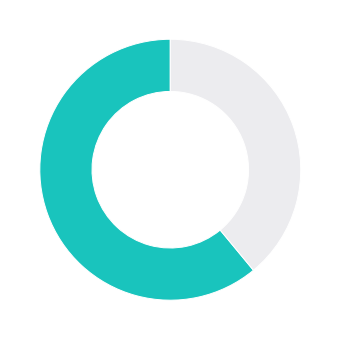

In [148]:
### Restoration Score (Indonesia)
fig, ax = plt.subplots(figsize=(6, 6))
 
ax.pie([61,39], 
       wedgeprops={'width':0.4}, 
       startangle=90, 
       colors=['#19C4BD', '#ECECEF'])
plt.show()

In [171]:
values =  [layer0.loc[layer0['Country']==country,'Tot_Restor'].values[0],
           layer0.loc[layer0['Country']==country,'Total_2016'].values[0]-layer0.loc[layer0['Country']==country,'Tot_Restor'].values[0]]
values

[186611.13815999925, 2516798.6818400007]

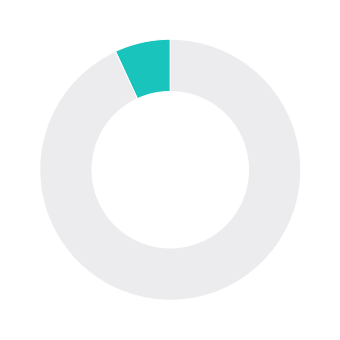

In [172]:
### Total Restorable Area (Indonesia)
fig, ax = plt.subplots(figsize=(6, 6))
values =  [layer0.loc[layer0['Country']==country,'Tot_Restor'].values[0],
           layer0.loc[layer0['Country']==country,'Total_2016'].values[0]-layer0.loc[layer0['Country']==country,'Tot_Restor'].values[0]]
ax.pie(values, 
       wedgeprops={'width':0.4}, 
       startangle=90, 
       colors=['#19C4BD', '#ECECEF'])
plt.show()

In [173]:
layer0.Loss_Driver.unique()

array(['No Data', 'NPC', 'Episodic Disturbances', 'Erosion', 'Settlement',
       'Commodities', 'Comoros'], dtype=object)

In [10]:
#Typology
layer1 = gpd.read_file('/Users/tamarahuete/Downloads/MOW_Global_Mangrove_Restoration_20190411.gdb', driver='FileGDB', layer=1)
layer1.head()

,Class,ID,Type,Country,Region,Max_Area_20_ha,Area_loss_ha,Area_loss_pct,Rest_Area_Loss,Rest_Area_Loss_pct,...,AGB,People,Fish_Score,Fish_Score_Inv,Prop_loss1,Total_2016,Shape_Length,Shape_Area,Loss_Driver,geometry
0,Delta,30028,Delta_30028,Madagascar,East and Southern Africa,16309.90,881.10,5,546.28200,3,...,33368.813410,4100,5.640000e+08,7.490000e+08,10,15428.795789,1.863918e+06,1.850339e+08,None,"MULTIPOLYGON (((4953272.062 -2264345.607, 4953..."
1,Delta,50000,Delta_50000,Malaysia,Southeast Asia,26443.76,623.85,2,557.09805,2,...,64521.662450,0,4.480000e+08,5.990000e+08,10,25690.633999,2.400825e+06,2.671475e+08,None,"MULTIPOLYGON (((13237272.764 595333.394, 13237..."
2,Delta,50001,Delta_50001,Indonesia,Southeast Asia,99528.85,3765.96,4,3483.51300,3,...,388074.656600,300,5.567000e+09,8.190000e+09,10,95362.286892,1.001024e+07,1.002791e+09,None,"MULTIPOLYGON (((13107771.090 420349.509, 13107..."
3,Delta,8735,Delta_8735,Honduras,North and Central America and the Caribbean,167.84,18.60,11,9.13260,5,...,789.999563,0,4.570000e+08,7.630000e+08,10,149.237108,6.041805e+04,1.826093e+06,None,"MULTIPOLYGON (((-9545201.058 1798187.105, -954..."
4,Delta,8736,Delta_8736,Brazil,South America,157354.23,9609.83,6,7822.40162,4,...,677196.074000,13400,1.500000e+07,0.000000e+00,10,146881.955184,2.592286e+07,1.575569e+09,None,"MULTIPOLYGON (((-5401790.660 -171081.462, -540..."


In [96]:
layer1.columns

Index(['Class', 'ID', 'Type', 'Country', 'Region', 'Max_Area_20_ha',
       'Area_loss_ha', 'Area_loss_pct', 'Rest_Area_Loss', 'Rest_Area_Loss_pct',
       'Area_dgrd_ha', 'Area_dgrd_pct', 'Tidal_range', 'Tidal_range1',
       'Ant_SLR', 'Ant_SLR1', 'Future_SLR', 'Future_SLR1', 'Time_Loss',
       'Time_Loss1', 'Sediment', 'Sediment1', 'Med_Patch', 'Med_Patch1',
       'Prop_loss', 'Rest_Score', 'SOC', 'AGB', 'People', 'Fish_Score',
       'Fish_Score_Inv', 'Prop_loss1', 'Total_2016', 'Shape_Length',
       'Shape_Area', 'Loss_Driver', 'geometry'],
      dtype='object')

In [149]:
layer1[layer1['Country']==country]

,Class,ID,Type,Country,Region,Max_Area_20_ha,Area_loss_ha,Area_loss_pct,Rest_Area_Loss,Rest_Area_Loss_pct,...,AGB,People,Fish_Score,Fish_Score_Inv,Prop_loss1,Total_2016,Shape_Length,Shape_Area,Loss_Driver,geometry
2,Delta,50001,Delta_50001,Indonesia,Southeast Asia,99528.85,3765.96,4,3483.51300,3,...,388074.656600,300,5.567000e+09,8.190000e+09,10,95362.286892,1.001024e+07,1.002791e+09,None,"MULTIPOLYGON (((13107771.090 420349.509, 13107..."
5,Delta,8739,Delta_8739,Indonesia,Southeast Asia,35737.83,2208.66,6,2036.38452,5,...,208968.104100,200,5.960000e+08,7.970000e+08,10,33223.750446,3.768050e+06,3.569481e+08,None,"MULTIPOLYGON (((13111753.854 218476.290, 13111..."
17,Delta,8753,Delta_8753,Indonesia,Southeast Asia,25046.25,1186.73,5,907.84845,3,...,109375.021400,0,3.950000e+08,6.620000e+08,10,23768.290943,5.203224e+06,2.546718e+08,None,"MULTIPOLYGON (((15478233.065 -808455.645, 1547..."
25,Delta,8764,Delta_8764,Indonesia,Southeast Asia,105505.79,2524.14,2,1832.52564,1,...,204712.820300,3300,1.977000e+09,3.827000e+09,10,102324.077339,7.869847e+06,1.055026e+09,None,"MULTIPOLYGON (((11503409.851 -69118.388, 11503..."
28,Delta,8767,Delta_8767,Indonesia,Southeast Asia,9952.69,908.43,9,787.60881,7,...,103872.770800,4600,1.373000e+09,1.837000e+09,10,9044.257077,1.055512e+06,1.001996e+08,None,"MULTIPOLYGON (((12146267.542 -46037.194, 12146..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5504,Fringe,63804,Fringe_63804,Indonesia,Southeast Asia,0.36,0.00,0,0.00000,0,...,0.000000,0,2.000000e+04,2.000000e+04,1,0.364189,2.970712e+02,3.677135e+03,None,"MULTIPOLYGON (((12645498.352 -346547.164, 1264..."
5510,Fringe,63810,Fringe_63810,Indonesia,Southeast Asia,3.73,0.06,2,0.06000,1,...,4.189500,0,5.000000e+06,7.000000e+06,1,3.665624,1.592008e+03,3.839074e+04,None,"MULTIPOLYGON (((13337460.306 -981433.224, 1333..."
5513,Fringe,63813,Fringe_63813,Indonesia,Southeast Asia,0.66,0.00,0,0.00000,0,...,0.000000,0,2.500000e+07,3.400000e+07,1,0.661099,4.475978e+02,6.810383e+03,None,"MULTIPOLYGON (((13257780.288 -975551.328, 1325..."
5514,Fringe,63814,Fringe_63814,Indonesia,Southeast Asia,5.41,1.74,32,1.50510,27,...,107.238375,0,2.000000e+07,2.800000e+07,4,3.666179,3.184359e+03,5.571987e+04,None,"MULTIPOLYGON (((12998529.563 -976151.995, 1299..."


In [150]:
layer1[layer1['Country']==country].groupby('Class').count()

,ID,Type,Country,Region,Max_Area_20_ha,Area_loss_ha,Area_loss_pct,Rest_Area_Loss,Rest_Area_Loss_pct,Area_dgrd_ha,...,AGB,People,Fish_Score,Fish_Score_Inv,Prop_loss1,Total_2016,Shape_Length,Shape_Area,Loss_Driver,geometry
Class,,,,,,,,,,,,,,,,,,,,,
Delta,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,0,13
Estuary,165,165,165,165,165,165,165,165,165,165,...,165,165,165,165,165,162,165,165,0,165
Fringe,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170,...,1170,1170,1170,1170,1170,871,1170,1170,0,1170
Lagoon,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,40,41,41,0,41


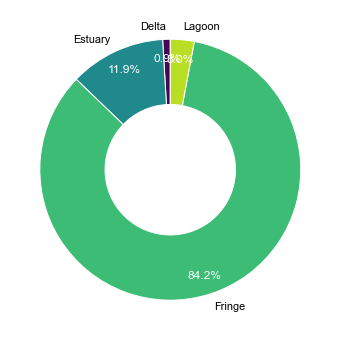

In [163]:
### Restoration Score (Indonesia)
fig, ax = plt.subplots(figsize=(6, 6))
 
patches, texts, autotexts= ax.pie([13,165,1170,41], 
       labels=['Delta','Estuary','Fringe','Lagoon'],
       autopct='%1.1f%%',
       wedgeprops={'width':0.5}, 
       startangle=90, 
       colors=['#450855', '#1F898C','#3DBC75','#B8DF24'],
      textprops={'color':"w"},
      pctdistance=0.85)
[text.set_color('black') for text in texts]
plt.show()

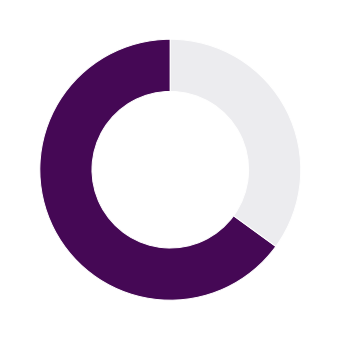

In [165]:
### Restoration Score (Indonesia)
fig, ax = plt.subplots(figsize=(6, 6))
 
ax.pie([65,35], 
       wedgeprops={'width':0.4}, 
       startangle=90, 
       colors=['#450855', '#ECECEF'])
plt.show()

<AxesSubplot:>

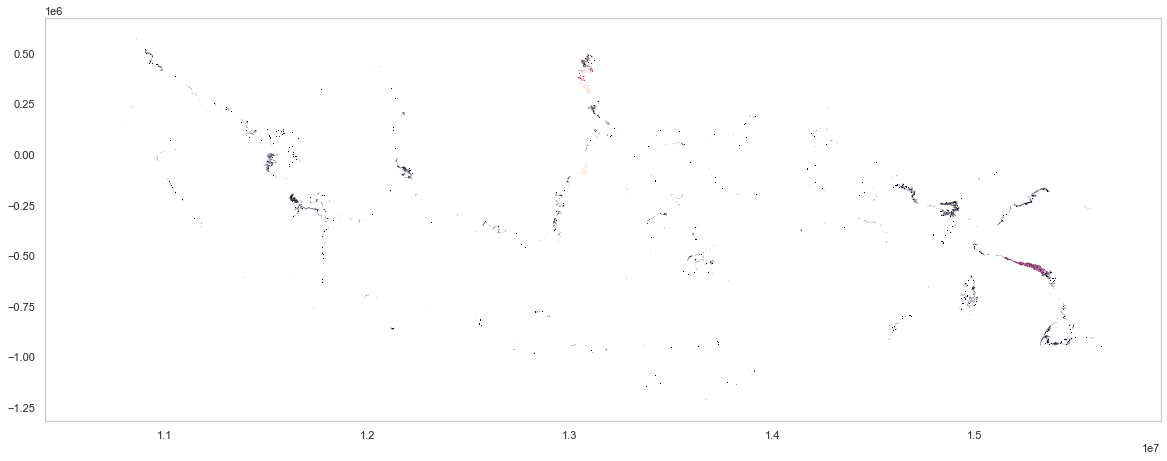

In [240]:
layer1[layer1['Country']==country].plot(column = 'Rest_Area_Loss',edgecolor = 'none')

In [93]:
layer1.loc[layer1['Country']==country,['Max_Area_20_ha','Area_loss_ha','Rest_Area_Loss','Class']].groupby(['Class']).sum()

,Max_Area_20_ha,Area_loss_ha,Rest_Area_Loss
Class,,,
Fringe,9247.67,414.92,372.84855


In [44]:
layer1[['Max_Area_20_ha','Area_loss_ha','Rest_Area_Loss','Class']].groupby(['Class']).sum()

,Max_Area_20_ha,Area_loss_ha,Rest_Area_Loss
Class,,,
Delta,5900382.87,371245.40,308786.64938
Estuary,3969023.06,203629.32,175459.96438
Fringe,3096498.37,212130.20,163399.44006
Lagoon,1679166.31,186634.69,164357.14573


In [40]:
layer1.loc[layer1['Country']==country,['Area_loss_pct','Rest_Area_Loss_pct','Area_dgrd_pct','Rest_Score','Class']].mean()

/Users/tamarahuete/opt/anaconda3/envs/gdalML/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Area_loss_pct         15.709497
Rest_Area_Loss_pct    12.168994
Area_dgrd_pct          1.244413
Rest_Score            67.987430
dtype: float64

In [39]:
layer1.loc[layer1['Country']==country,['Area_loss_pct','Rest_Area_Loss_pct','Area_dgrd_pct','Rest_Score','Class']].groupby(['Class']).mean()

,Area_loss_pct,Rest_Area_Loss_pct,Area_dgrd_pct,Rest_Score
Class,,,,
Delta,3.500000,3.000000,1.000000,90.500000
Estuary,6.451613,5.005376,0.392473,75.881720
Fringe,20.537118,15.805677,1.591703,63.683406
Lagoon,9.071429,7.671429,1.242857,74.528571


In [38]:
layer1.columns

Index(['Class', 'ID', 'Type', 'Country', 'Region', 'Max_Area_20_ha',
       'Area_loss_ha', 'Area_loss_pct', 'Rest_Area_Loss', 'Rest_Area_Loss_pct',
       'Area_dgrd_ha', 'Area_dgrd_pct', 'Tidal_range', 'Tidal_range1',
       'Ant_SLR', 'Ant_SLR1', 'Future_SLR', 'Future_SLR1', 'Time_Loss',
       'Time_Loss1', 'Sediment', 'Sediment1', 'Med_Patch', 'Med_Patch1',
       'Prop_loss', 'Rest_Score', 'SOC', 'AGB', 'People', 'Fish_Score',
       'Fish_Score_Inv', 'Prop_loss1', 'Total_2016', 'Shape_Length',
       'Shape_Area', 'Loss_Driver', 'geometry'],
      dtype='object')

In [48]:
layer1.loc[layer1['Country']==country,layer1.columns[12:27]]

,Tidal_range,Tidal_range1,Ant_SLR,Ant_SLR1,Future_SLR,Future_SLR1,Time_Loss,Time_Loss1,Sediment,Sediment1,Med_Patch,Med_Patch1,Prop_loss,Rest_Score,SOC
8,Micro,5,Low,7,Low,10,pre-2016,10,Increasing,10,Medium,10,73.7838,87,136380.752000
16,Macro,10,Low,7,Low,10,pre-2016,10,None,8,Medium,10,70.8455,94,63956.754210
80,Micro,5,High,5,Low,10,pre-2007,2,Declining,3,Medium,10,0.0000,51,485.064255
81,Macro,10,Low,7,Low,10,pre-2016,10,Increasing,10,Medium,10,86.9974,98,39027.633370
84,Meso,8,Low,7,Low,10,pre-2007,2,Declining,3,Medium,10,15.4268,61,3025.240344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,Meso,8,None,10,Low,10,None,0,Declining,3,None,0,0.0000,0,0.000000
4890,Meso,8,Low,7,Low,10,pre-2016,10,Declining,3,Medium,10,100.0000,84,151.660916
4892,Micro,5,Low,7,Low,10,pre-2007,2,Increasing,10,Small,8,22.2225,63,164.602857
4894,Micro,5,High,5,High,5,pre-2007,2,None,8,Large,5,0.0000,44,1731.461053


In [ ]:
### How is the aggregation made in the dashboard? (specifically for Typology, 
### there are no changes when changing countries, but values don't match global values for Delta either)
### Dashboard only shows Delta class
### Percent contiguous in dataset is prop_loss?
### Do we have the layers to match this data?

In [ ]:
### Geogrpahy

## 3. mangroves in protected Areas
- It does not include the new basemap as my understanding is it's still under review?--> Is this question for us? What basemap are they referring to?
- It might be helpful to discuss whether these populations can be updated on the fly in the future with new versions of the WDPA?  
[data](https://github.com/Vizzuality/mangrove-atlas/issues/333)

In [14]:
pa = pd.read_excel('/Users/tamarahuete/Downloads/Mangrove_Protection_Calculations_20210430.xlsx',sheet_name = 'National')

In [15]:
pa.head()

,Country,Total Mangrove Composite,Total Protected Mangrove Composite,Total Mangrove 1996,Total Protected Mangrove 1996,Total Mangrove 2007,Total Protected Mangrove 2007,Total Mangrove 2010,Total Protected Mangrove 2010,Total Mangrove 2016,Total Protected Mangrove 2016,Net Change in Total Mangrove Extent,Net Change in Protected Mangrove Extent,Unnamed: 13,% in protected areas in 1996,% in protected areas in 2007,% in protected areas in 2010,% protected in 2016
0,American Samoa,0.187447,0.000000,0.187447,0.000000,0.187447,0.000000,0.187447,0.000000,0.187447,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
1,Angola,139.542529,1.769203,136.884844,1.725696,133.431203,1.715800,129.155410,1.611917,132.828293,1.687598,-4.056551,-0.038098,NaN,0.012607,0.012859,0.012705,0.012705
2,Anguilla,0.021393,0.000000,0.021393,0.000000,0.021393,0.000000,0.008674,0.000000,0.008674,0.000000,-0.012719,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
3,Antigua and Barbuda,9.064915,4.494175,9.048649,4.479555,9.048649,4.479555,8.856625,4.435916,8.863024,4.444657,-0.185625,-0.034898,NaN,0.495052,0.495052,0.501483,0.501483
4,Aruba,0.543387,0.008297,0.543387,0.008297,0.337894,0.008297,0.337894,0.008297,0.337894,0.008297,-0.205493,0.000000,NaN,0.015269,0.024555,0.024555,0.024555


In [220]:
pa[pa['Country']==country]

,Country,Total Mangrove Composite,Total Protected Mangrove Composite,Total Mangrove 1996,Total Protected Mangrove 1996,Total Mangrove 2007,Total Protected Mangrove 2007,Total Mangrove 2010,Total Protected Mangrove 2010,Total Mangrove 2016,Total Protected Mangrove 2016,Net Change in Total Mangrove Extent,Net Change in Protected Mangrove Extent,Unnamed: 13,% in protected areas in 1996,% in protected areas in 2007,% in protected areas in 2010,% protected in 2016
51,Indonesia,29058.373386,6821.909877,28593.781496,6743.616518,27329.427678,6624.398391,27074.904571,6639.836475,26856.60338,6574.393765,-1737.178116,-169.222753,NaN,0.235842,0.242391,0.244796,0.244796


In [24]:
df = pa[pa['Country']==country].unstack()

In [28]:
pa.columns

Index(['Country', 'Total Mangrove Composite',
       'Total Protected Mangrove Composite', 'Total Mangrove 1996',
       'Total Protected Mangrove 1996', 'Total Mangrove 2007',
       'Total Protected Mangrove 2007', 'Total Mangrove 2010',
       'Total Protected Mangrove 2010', 'Total Mangrove 2016',
       'Total Protected Mangrove 2016', 'Net Change in Total Mangrove Extent',
       'Net Change in Protected Mangrove Extent', 'Unnamed: 13',
       '% in protected areas in 1996', '% in protected areas in 2007',
       '% in protected areas in 2010', '% protected in 2016'],
      dtype='object')

In [41]:
pa[['Country','Total Mangrove 1996','Total Mangrove 2007','Total Mangrove 2010','Total Mangrove 2016']].pivot_table(columns=['Country'])

Country,American Samoa,Angola,Anguilla,Antigua and Barbuda,Aruba,Australia,Bahamas,Bahrain,Bangladesh,Barbados,...,Tonga,Trinidad and Tobago,Turks and Caicos Islands,United Arab Emirates,United States,Vanuatu,Venezuela,Vietnam,"Virgin Islands, U.S.",Yemen
Total Mangrove 1996,0.187447,136.884844,0.021393,9.048649,0.543387,9951.484408,1078.913006,0.654730,4138.022669,0.136871,...,8.903727,57.279462,128.133761,79.519795,2085.422164,17.700817,2835.331008,1718.177229,2.067021,15.265364
Total Mangrove 2007,0.187447,133.431203,0.021393,9.048649,0.337894,9857.920227,1030.588846,0.651996,4137.246296,0.136871,...,8.903727,54.392347,124.951006,77.021656,1981.861799,17.700817,2803.137176,1622.112847,2.067021,15.403492
Total Mangrove 2010,0.187447,129.155410,0.008674,8.856625,0.337894,9892.705637,988.669217,0.651996,4142.574441,0.136871,...,8.711730,54.947724,121.508250,77.486106,1928.185023,17.690338,2819.901697,1599.763440,2.061252,15.410758
Total Mangrove 2016,0.187447,132.828293,0.008674,8.863024,0.337894,9671.315681,969.685325,0.651449,4086.555040,0.136871,...,8.651036,52.767197,117.838465,72.694220,1878.657784,17.636071,2781.476135,1589.863153,2.049654,15.419600


In [210]:
# Reformat data
total= pd.melt(pa,id_vars='Country',value_vars =['Total Mangrove 1996','Total Mangrove 2007','Total Mangrove 2010','Total Mangrove 2016'],var_name='year')
prot = pd.melt(pa,id_vars='Country',value_vars =['Total Protected Mangrove 1996','Total Protected Mangrove 2007','Total Protected Mangrove 2010','Total Protected Mangrove 2016'],var_name='year')
per = pd.melt(pa,id_vars='Country',value_vars =['% in protected areas in 1996','% in protected areas in 2007','% in protected areas in 2010','% protected in 2016'],var_name='year')
# Change year values
total.replace({'Total Mangrove 1996':1996,'Total Mangrove 2007':2007,'Total Mangrove 2010':2010,'Total Mangrove 2016':2016}, inplace =True)
prot.replace({'Total Protected Mangrove 1996':1996,'Total Protected Mangrove 2007':2007,'Total Protected Mangrove 2010':2010,'Total Protected Mangrove 2016':2016}, inplace =True)
per.replace({'% in protected areas in 1996':1996,'% in protected areas in 2007':2007,'% in protected areas in 2010':2010,'% protected in 2016':2016}, inplace =True)
# Change var names
total.rename(columns={'value':'total_mangrove'},inplace=True)
prot.rename(columns={'value':'prot_mangrove'},inplace=True)
per.rename(columns={'value':'per_prot'},inplace=True)

#merge in one file
total = total.merge(prot, how ='inner',on = ['Country','year'])
total = total.merge(per, how ='inner',on = ['Country','year'])


In [211]:
country = 'Indonesia'
total[total['Country']==country]

,Country,year,total_mangrove,prot_mangrove,per_prot
51,Indonesia,1996,28593.781496,6743.616518,0.235842
159,Indonesia,2007,27329.427678,6624.398391,0.242391
267,Indonesia,2010,27074.904571,6639.836475,0.244796
375,Indonesia,2016,26856.603380,6574.393765,0.244796


In [212]:
sns.set_style("whitegrid", {'axes.grid' : False})

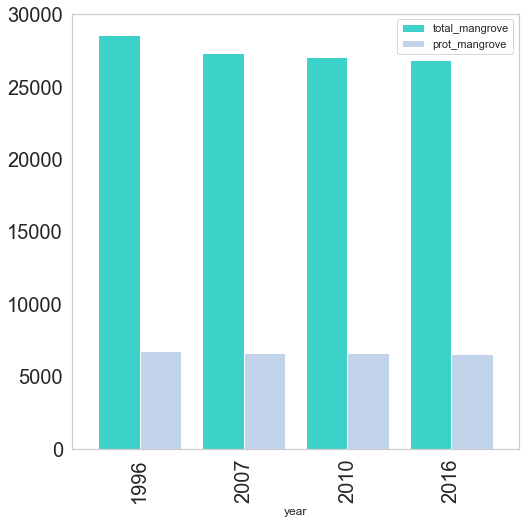

In [239]:
sns.set_style("whitegrid", {'axes.grid' : False})
color_list = ['#3CD2C9','#C2D4E9']
#columns_and_colors = zip(['total_mangrove','prot_mangrove'], ['#3CD2C9','#C2D4E9'])
ax = total.loc[total['Country']==country,['total_mangrove','prot_mangrove','year']].plot.bar(x='year',figsize=(8,8),color = color_list,width = 0.8)
                                                                                            
#ax = total.loc[total['Country']==country,['total_mangrove','prot_mangrove','year']].plot.line(x='year',figsize=(6,6),color = color_list,style='o-',legend=False)
ax.set_facecolor('white')
ax.tick_params(axis='both', which='major', labelsize=20)
#ax.grid(False)

In [ ]:
ax = total[total['Country']==country].plot.bar(x='year',figsize=(6,6),color = color_list,width = 0.8,legend=False)

In [87]:
total['per_prot'] = round(total['prot_mangrove']/total['total_mangrove']*100,2)

In [96]:
total.loc[(total['Country']==country) & (total['year']==2016)]

,Country,year,total_mangrove,prot_mangrove,per_prot
375,Indonesia,2016,26856.60338,6574.393765,24.48


In [98]:
100-24.48

75.52

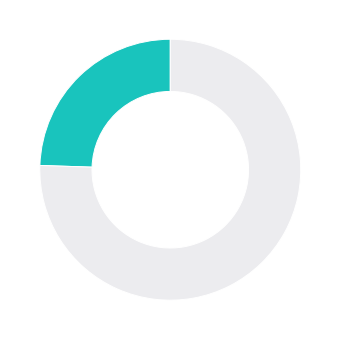

In [101]:
fig, ax = plt.subplots(figsize=(6, 6))
 
ax.pie([24.48,75.52], 
       wedgeprops={'width':0.4}, 
       startangle=90, 
       colors=['#19C4BD', '#ECECEF'])
plt.show()

## 4. Climate mitigation & policy
[data](https://github.com/Vizzuality/mangrove-atlas/discussions/293)  
[Vizz first proposal](https://docs.google.com/presentation/d/1dKieOCHcbSxNHBekKN9escwsTxYn8JCW/edit#slide=id.ge4bf46cf90_0_24)

In [62]:
cmp = pd.read_csv('/Users/tamarahuete/Downloads/Climate_Policy_Tool_Data_20210701_KLW.csv',encoding = 'latin-1',skiprows=1)

In [63]:
cmp.head()

,id,type,iso,name,Total Organic Carbon,NDC Target,NDC Target URL,NDC: first/updated,NDC:includes/doesn't include,NDC Mitigation (Y/N),NDC Adaptation (Y/N),FREL Date,FREL,Investible Blue Carbon Extent,Climate Mitigation Potential,Forest/Wetland,Wetland Supplement,GHG Inventories
0,1_2_97,country,AGO,Angola,6.507752e+07,96.65,https://www4.unfccc.int/sites/NDCStaging/pages...,Updated,Includes,No,Yes,NaN,NaN,900 (±100),"29,000 (±4,000)",Forest,Has not,are
1,1_2_68,country,ATG,Antigua & Barbuda,1.474961e+06,324.80,https://www4.unfccc.int/sites/NDCStaging/pages...,NaN,Doesn't include,No,No,NaN,NaN,NaN,NaN,Wetland,Has not,are not
2,1_2_69,country,AUS,Australia,1.469115e+09,161.00,https://www4.unfccc.int/sites/NDCStaging/pages...,Updated,Includes,Yes,No,NaN,NaN,NaN,NaN,Forest,Has,are not
3,1_2_98,country,BHR,Bahrain,1.091170e+05,NaN,https://www4.unfccc.int/sites/NDCStaging/pages...,NaN,Doesn't include,No,No,NaN,NaN,NaN,NaN,Forest,Has not,are
4,1_2_70,country,BGD,Bangladesh,4.083657e+08,35.10,https://www4.unfccc.int/sites/NDCStaging/pages...,NaN,Doesn't include,No,No,2019.0,"374,253","98,900 (±2,800)","808,000 (±75,000)",Wetland,Has not,are not


In [64]:
cmp[cmp['name']=='Indonesia']

,id,type,iso,name,Total Organic Carbon,NDC Target,NDC Target URL,NDC: first/updated,NDC:includes/doesn't include,NDC Mitigation (Y/N),NDC Adaptation (Y/N),FREL Date,FREL,Investible Blue Carbon Extent,Climate Mitigation Potential,Forest/Wetland,Wetland Supplement,GHG Inventories
40,1_2_94,country,IDN,Indonesia,6.694025e+09,1181.21,https://www4.unfccc.int/sites/NDCStaging/pages...,NaN,NaN,NaN,NaN,2017.0,"593,329,235","325,400 (±21,100)","11,262,000 (±1,889,000)",Wetland,Has not,are not
